<a href="https://colab.research.google.com/github/MehmetAltinkurt/Computer_Vision_Projects/blob/main/Wheat/Wheat_Yellow_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download nafishamoin/new-bangladeshi-crop-disease

100% 2.34G/2.35G [02:03<00:00, 16.7MB/s]
100% 2.35G/2.35G [02:03<00:00, 20.4MB/s]


In [ ]:
! unzip new-bangladeshi-crop-disease

In [65]:
import os
import shutil


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import PIL
import PIL.Image
from matplotlib.image import imread

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix

from keras import utils

In [9]:
tf.__version__

'2.12.0'

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
!nvidia-smi

Tue Apr  4 05:50:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
original_dataset_dir="/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat"

In [13]:
base_dir="/content/tempdir"
os.mkdir(base_dir)

In [14]:
print('total Healthy images:', len(os.listdir(original_dataset_dir+"/Wheat___Healthy")))
print('total Yellow Rust images:', len(os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust")))

total Healthy images: 1116
total Yellow Rust images: 924


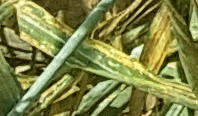

In [15]:
PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923])

In [16]:
#to see if the images are same sized
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[0]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[100]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[350]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[600]).shape)

(70, 268, 3)
(116, 198, 3)
(246, 216, 3)
(436, 60, 3)
(130, 358, 3)


In [17]:
healthy_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Healthy/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            #healthy_wheat_list.append(os.path.join(root, file))
            healthy_wheat_list.append(file)

rusty_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Yellow_Rust/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            #rusty_wheat_list.append(os.path.join(root, file))
            rusty_wheat_list.append(file)




In [18]:
height_list=[]
width_list=[]

for im in healthy_wheat_list:
  height_list.append(imread(original_dataset_dir+"/Wheat___Healthy/"+im).shape[0])
  width_list.append(imread(original_dataset_dir+"/Wheat___Healthy/"+im).shape[1])

for im in rusty_wheat_list:
  height_list.append(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+im).shape[0])
  width_list.append(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+im).shape[1])

print(height_list)
print(width_list)

[1061, 947, 585, 1026, 448, 725, 431, 1105, 729, 1525, 1341, 614, 1204, 337, 560, 464, 545, 758, 408, 1388, 496, 777, 550, 1186, 374, 728, 1022, 660, 731, 251, 629, 270, 615, 736, 483, 393, 620, 821, 577, 892, 800, 362, 607, 1087, 945, 1485, 836, 1599, 766, 634, 359, 535, 773, 929, 266, 1206, 711, 1195, 693, 1316, 565, 680, 350, 936, 1091, 674, 351, 795, 301, 1089, 665, 499, 894, 586, 821, 686, 629, 845, 390, 1044, 967, 1324, 1108, 574, 488, 801, 273, 648, 447, 1021, 490, 924, 393, 586, 290, 512, 729, 518, 975, 469, 302, 1732, 670, 910, 1488, 490, 806, 891, 878, 977, 389, 972, 742, 442, 1036, 859, 507, 1040, 580, 359, 232, 949, 1551, 814, 690, 236, 968, 568, 1362, 1171, 392, 1809, 531, 747, 212, 397, 498, 1147, 398, 441, 1178, 531, 604, 1040, 687, 626, 986, 542, 1106, 606, 645, 662, 958, 1087, 1065, 1274, 312, 330, 580, 544, 450, 645, 870, 836, 1108, 389, 782, 734, 267, 775, 411, 771, 278, 1066, 582, 325, 390, 797, 742, 1300, 1495, 202, 876, 1304, 499, 656, 1110, 719, 386, 1269, 693, 5

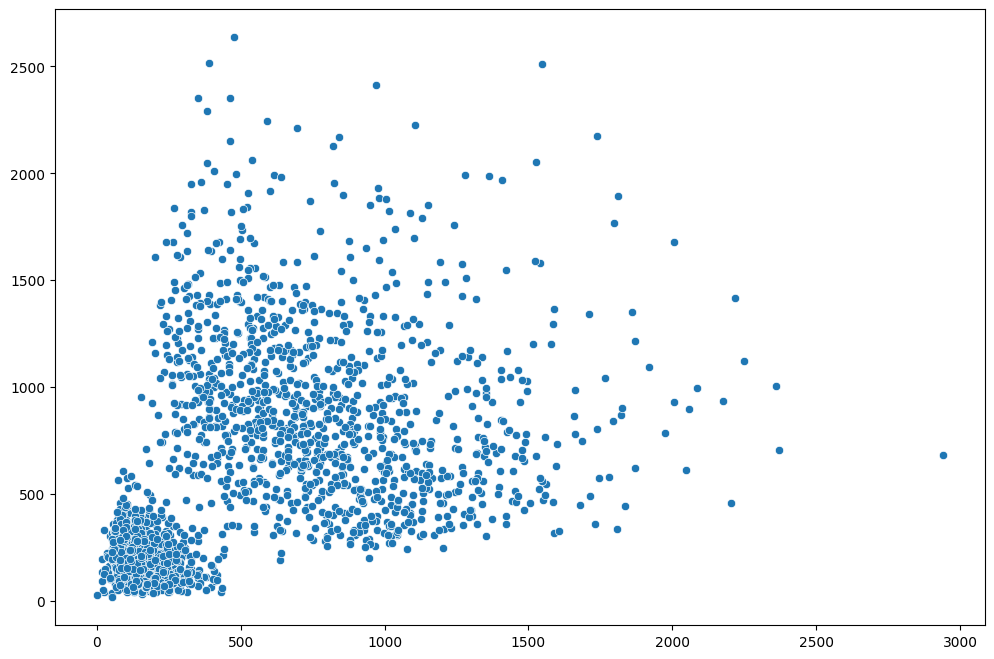

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=height_list, y=width_list);


In [20]:
print(min(height_list))
min_image_index=np.argmin(height_list)
print("index:",min_image_index)
im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

1
index: 1635


(1, 30, 3)

In [21]:
print(min(width_list))
min_image_index=np.argmin(width_list)
im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

18


(52, 18, 3)

In [22]:
treshold_for_imsize=20
print("count of images with height less than 20px:",sum(np.array(height_list)<treshold_for_imsize))
print("count of images with width less than 20px:",sum(np.array(width_list)<treshold_for_imsize))

count of images with height less than 20px: 4
count of images with width less than 20px: 1


In [23]:
min_height_image_indexes=[i for i in range(len(height_list)) if height_list[i] < treshold_for_imsize]
for i in min_height_image_indexes:
  im=PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[i-len(healthy_wheat_list)])
  im.show()
  print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+rusty_wheat_list[i-len(healthy_wheat_list)]).shape)

(18, 196, 3)


(18, 94, 3)


(1, 30, 3)


(18, 138, 3)


In [24]:
#decided to exclude the image with the height of 1px
rusty_wheat_list.pop(min_image_index-len(healthy_wheat_list))
print(len(rusty_wheat_list))

923


In [25]:
height_list.pop(min_image_index)
width_list.pop(min_image_index)

18

In [26]:
np.mean(height_list),np.median(height_list)

(518.5890142226582, 372.0)

In [27]:
np.mean(width_list),np.median(width_list)

(590.3786169691025, 438.0)

In [28]:
img_size=(372,372)

In [29]:
seed=53
np.random.seed(seed)

In [30]:
np.random.shuffle(healthy_wheat_list)

print(len(healthy_wheat_list))
healthy_validation_list=healthy_wheat_list[:3*int(len(healthy_wheat_list)/10):]
healthy_train_list=healthy_wheat_list[3*int(len(healthy_wheat_list)/10)::]

print(len(healthy_validation_list))
print(len(healthy_train_list))

1116
333
783


In [31]:
np.random.shuffle(rusty_wheat_list)

print(len(rusty_wheat_list))
rusty_validation_list=rusty_wheat_list[:3*int(len(rusty_wheat_list)/10):]
rusty_train_list=rusty_wheat_list[3*int(len(rusty_wheat_list)/10)::]

print(len(rusty_validation_list))
print(len(rusty_train_list))

923
276
647


In [32]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
train_healthy_dir = os.path.join(train_dir, 'healthy')
os.mkdir(train_healthy_dir)
train_yellow_rust_dir = os.path.join(train_dir, 'yellow_rust')
os.mkdir(train_yellow_rust_dir)
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
os.mkdir(validation_healthy_dir)
validation_yellow_rust_dir = os.path.join(validation_dir, 'yellow_rust')
os.mkdir(validation_yellow_rust_dir)

In [33]:
for fname in healthy_train_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(train_healthy_dir, fname)
  shutil.copyfile(src, dst)
for fname in healthy_validation_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Healthy/", fname)
  dst = os.path.join(validation_healthy_dir, fname)
  shutil.copyfile(src, dst)

for fname in rusty_train_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(train_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)
for fname in rusty_validation_list:
  src = os.path.join(original_dataset_dir+"/Wheat___Yellow_Rust/", fname)
  dst = os.path.join(validation_yellow_rust_dir, fname)
  shutil.copyfile(src, dst)


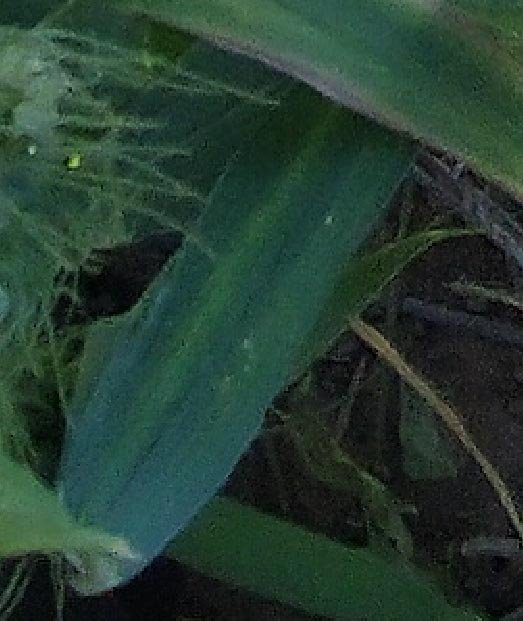

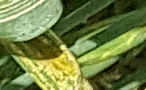

In [34]:
im=PIL.Image.open("/content/tempdir/validation/healthy/Healthy003.jpg")
im.show()
im=PIL.Image.open("/content/tempdir/train/yellow_rust/Yellow_rust004.jpg")
im.show()

In [35]:
image_gen = ImageDataGenerator(rescale=1./255)

In [36]:
train_image_gen = image_gen.flow_from_directory(directory=train_dir,
                                                target_size=img_size,
                                                color_mode='rgb',
                                                batch_size=20,
                                                class_mode='binary',
                                                shuffle=True)

Found 1430 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(directory=validation_dir,
                                                   target_size=img_size,
                                                   color_mode='rgb',
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   shuffle=False)

Found 609 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'healthy': 0, 'yellow_rust': 1}

In [39]:
test_image_gen.class_indices

{'healthy': 0, 'yellow_rust': 1}

In [40]:
train_image_gen[0][0].shape

(20, 372, 372, 3)

In [41]:

type(test_image_gen[0][0][0])

numpy.ndarray

In [42]:
type(test_image_gen[0])

tuple

In [43]:
len(test_image_gen[0][1])

20

In [44]:
test_image_gen[2][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [45]:
len(train_image_gen), len(test_image_gen)

(72, 31)

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=img_size + (3,)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 370, 370, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 185, 185, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 183, 183, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 91, 91, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 89, 89, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 44, 44, 256)      0

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [49]:
model.fit(train_image_gen,
          epochs=20,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen))

Epoch 1/20
72/72 [==============================] - 48s 396ms/step - loss: 0.5137 - acc: 0.8692 - val_loss: 0.0677 - val_acc: 0.9819
Epoch 2/20
72/72 [==============================] - 25s 344ms/step - loss: 0.0780 - acc: 0.9713 - val_loss: 0.0482 - val_acc: 0.9836
Epoch 3/20
72/72 [==============================] - 25s 347ms/step - loss: 0.0271 - acc: 0.9937 - val_loss: 0.1618 - val_acc: 0.9442
Epoch 4/20
72/72 [==============================] - 26s 356ms/step - loss: 0.0705 - acc: 0.9783 - val_loss: 0.0646 - val_acc: 0.9836
Epoch 5/20
72/72 [==============================] - 25s 349ms/step - loss: 0.0310 - acc: 0.9909 - val_loss: 0.0729 - val_acc: 0.9770
Epoch 6/20
72/72 [==============================] - 25s 343ms/step - loss: 0.1380 - acc: 0.9685 - val_loss: 0.0613 - val_acc: 0.9770
Epoch 7/20
72/72 [==============================] - 25s 351ms/step - loss: 0.0189 - acc: 0.9916 - val_loss: 0.0728 - val_acc: 0.9721
Epoch 8/20
72/72 [==============================] - 25s 344ms/step - 

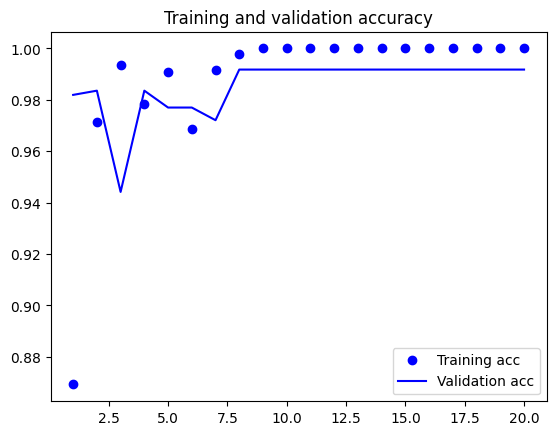

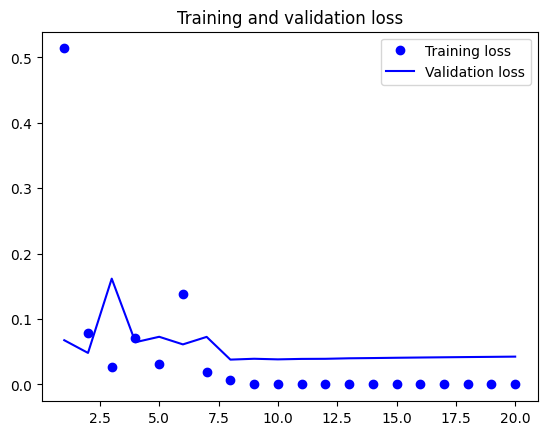

In [50]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
score = model.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

31/31 [==============================] - 7s 227ms/step - loss: 0.0426 - acc: 0.9918
Test loss: 0.042584117501974106
Test accuracy: 0.9917898178100586


In [53]:
model.save('wheat_rust_model.h5')

In [55]:
pred_prob = model.predict(test_image_gen)

31/31 [==============================] - 8s 237ms/step


In [56]:
y_pred = pred_prob > 0.5

In [ ]:
y_pred

In [57]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
confusion_matrix(y_test, y_pred)

array([[329,   4],
       [  1, 275]])

In [59]:

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
target_names =  list(test_image_gen.class_indices.keys())
print(classification_report(test_image_gen.classes, y_pred, target_names=target_names))

Confusion Matrix
[[329   4]
 [  1 275]]
Classification Report
              precision    recall  f1-score   support

     healthy       1.00      0.99      0.99       333
 yellow_rust       0.99      1.00      0.99       276

    accuracy                           0.99       609
   macro avg       0.99      0.99      0.99       609
weighted avg       0.99      0.99      0.99       609



**Prediction**

In [73]:
target_class = np.random.choice(list(test_image_gen.class_indices.keys()))
target_class

'healthy'

In [74]:
random_image = np.random.choice(
    os.listdir(os.path.join(validation_dir, target_class)),
    1)
random_image

array(['Healthy547.jpg'], dtype='<U15')

In [75]:
image_path = os.path.join(validation_dir, target_class, random_image[0])
image_path

'/content/tempdir/validation/healthy/Healthy547.jpg'

In [76]:
my_image = utils.img_to_array(utils.load_img(image_path, target_size=img_size))
my_image

array([[[127., 134., 100.],
        [ 88.,  98.,  63.],
        [ 88.,  98.,  63.],
        ...,
        [209., 209., 159.],
        [141., 143.,  94.],
        [ 67.,  61.,  39.]],

       [[108., 123.,  84.],
        [120., 135.,  96.],
        [104., 119.,  80.],
        ...,
        [123., 130.,  79.],
        [147., 154., 102.],
        [220., 224., 174.]],

       [[ 71.,  75.,  38.],
        [136., 144., 103.],
        [121., 133.,  93.],
        ...,
        [ 97., 100.,  71.],
        [176., 176., 148.],
        [165., 166., 134.]],

       ...,

       [[ 43.,  48.,  68.],
        [ 42.,  47.,  67.],
        [ 48.,  53.,  73.],
        ...,
        [159., 198., 154.],
        [157., 196., 152.],
        [164., 201., 158.]],

       [[ 45.,  50.,  70.],
        [ 41.,  46.,  66.],
        [ 38.,  43.,  63.],
        ...,
        [149., 188., 144.],
        [153., 192., 148.],
        [151., 188., 145.]],

       [[ 44.,  49.,  68.],
        [ 47.,  52.,  71.],
        [ 42.,  

In [77]:
my_image.shape

(372, 372, 3)

In [78]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 372, 372, 3)

In [79]:
model.predict(my_image)

1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)

In [80]:
random_image

array(['Healthy547.jpg'], dtype='<U15')

In [81]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    target_class = np.random.choice(list(test_image_gen.class_indices.keys()))
    random_image = np.random.choice(os.listdir(os.path.join(validation_dir, target_class)),1)
    image_path = os.path.join(validation_dir, target_class, random_image[0])
    img = utils.load_img(image_path, target_size=img_size)
    img = np.array(img)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = list(test_image_gen.class_indices.keys())[pred.argmax()]  # if more than one output, take the max
    else:
        pred_class = list(test_image_gen.class_indices.keys())[int(tf.round(pred)[0][0])]  # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 27ms/step
prediction_probability:  1.0


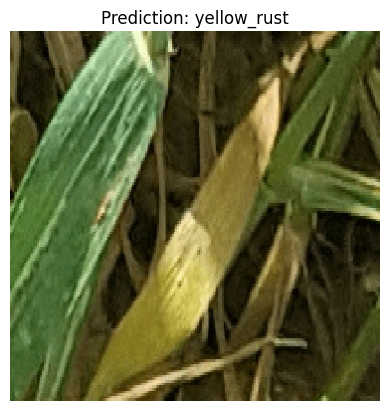

In [85]:
pred_and_plot(model, (372, 372))